# CMP 464 Midterm Project: Predicting Housing Prices at Ames, Iowa, Part I

# I. Overall understanding of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import folium
%matplotlib inline 

In [2]:
# 1. Load the data as a pandas DataFrame.
url = "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/train.csv"
House_price = pd.read_csv('train.csv')
House_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 2. Display:
# The first 5 rows of the dataset
House_price.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(House_price.shape)

(1460, 81)


In [5]:
#- Number of instances
count_row = House_price.shape[0]
print(count_row)

1460


In [6]:
# Number of features
count_columns = House_price.shape[1]
print(count_columns)

81


In [7]:
# - Feature names
House_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# - Data type of each feature
House_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# - Number of missing values for each feature
House_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# 3. Check if the data types are correctly identified. (A common situation is that a numeric feature is identified as "object")
# By looking the numric features values such as Id , MSSubclass, LotArea they are are not identified as object

In [11]:
# let verify mean of missing values
#df.isnull().mean()
House_price.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [12]:
# 4, Handle missing values. 
# - Remove the feature if more than 30% of its values are missing
data = House_price[House_price.columns[House_price.isnull().mean()<0.3]]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
data.shape

(1460, 76)

In [14]:
# Remove the rows containing the missing values if less than 5% of values are missing in a column
data.drop(data[data.isnull().sum(axis = 1) < 0.5].index, axis = 0, inplace = True)
data.head()

C:\Users\fadil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000


In [15]:
data.shape

(366, 76)

In [16]:
# If the percentage of missing values is between 5% and 30%, fill the missing data with the most frequent value 
# (categorical feature) or the average value (for numeric feature).
data = data.fillna(data.mean())
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,62.794393,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,62.794393,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,62.794393,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,62.794393,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
17,18,90,RL,72.000000,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000


In [17]:
data.shape

(366, 76)

# II: Most relevant features

In [18]:
# let extract the relevant
relevant_features = ['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']
House_price = House_price.filter(relevant_features, axis=1)
House_price.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500
3,7,1915,756,1717,140000
4,8,2000,1145,2198,250000


In [19]:
#1. Descriptive statistics: minimum, mean, median, maximum, standard deviation
House_price.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1515.463699,180921.195890
std,1.382997,30.202904,438.705324,525.480383,79442.502883
min,1.000000,1872.000000,0.000000,334.000000,34900.000000
25%,5.000000,1954.000000,795.750000,1129.500000,129975.000000
50%,6.000000,1973.000000,991.500000,1464.000000,163000.000000
75%,7.000000,2000.000000,1298.250000,1776.750000,214000.000000
max,10.000000,2010.000000,6110.000000,5642.000000,755000.000000


Text(0, 0.5, 'Number of Houses Built')

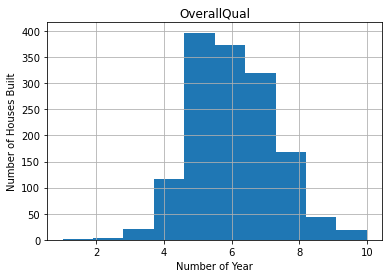

In [20]:
# 2. Histogram (set title, axis labels properly)
House_price['OverallQual'].hist()
plt.title("OverallQual")
plt.xlabel("Number of Year")
plt.ylabel("Number of Houses Built")

Text(0, 0.5, 'Number of Basement')

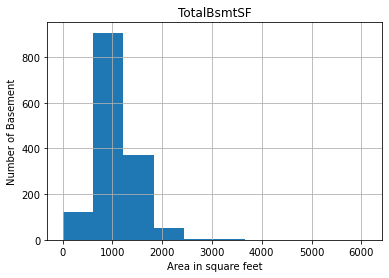

In [21]:
House_price['TotalBsmtSF'].hist()
plt.title("TotalBsmtSF")
plt.xlabel("Area in square feet")
plt.ylabel("Number of Basement")

Text(0, 0.5, 'Number of Houses Built')

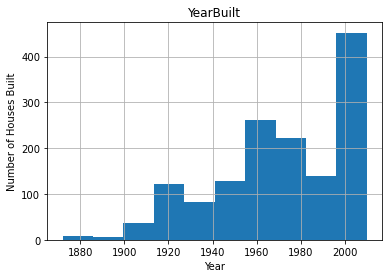

In [22]:
House_price['YearBuilt'].hist()
plt.title('YearBuilt')
plt.xlabel("Year")
plt.ylabel("Number of Houses Built")

Text(0, 0.5, 'Number of Above Ground Living')

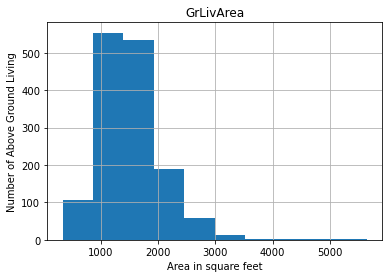

In [23]:
House_price['GrLivArea'].hist()
plt.title("GrLivArea")
plt.xlabel("Area in square feet")
plt.ylabel("Number of Above Ground Living")

Text(0, 0.5, 'Number of House')

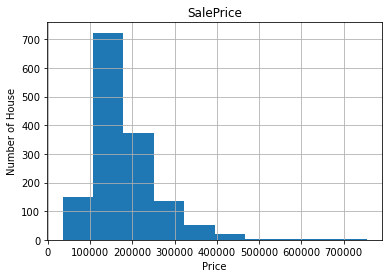

In [24]:
House_price['SalePrice'].hist()
plt.title("SalePrice")
plt.xlabel("Price")
plt.ylabel("Number of House")

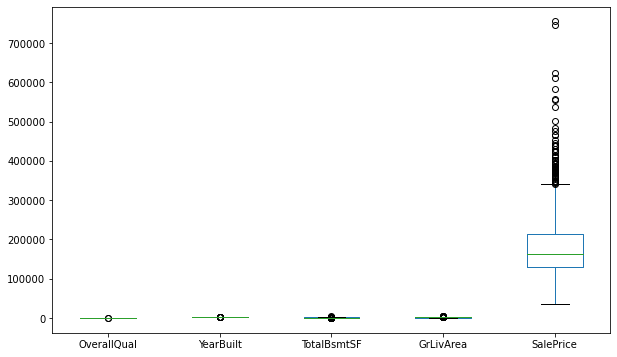

In [25]:
# 3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.
House_price.plot.box(figsize=(10, 6))

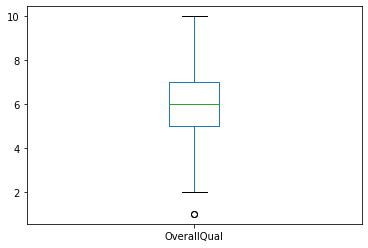

In [26]:
House_price['OverallQual'].plot.box()

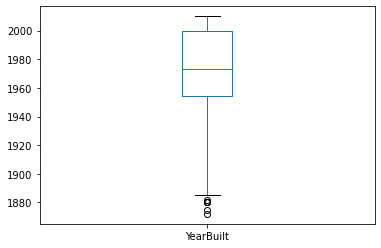

In [27]:
House_price['YearBuilt'].plot.box()

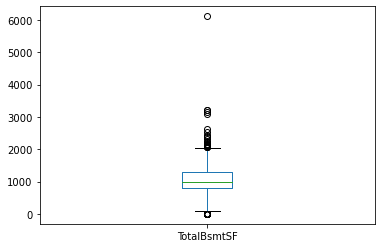

In [28]:
House_price['TotalBsmtSF'].plot.box()

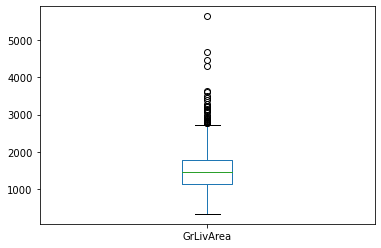

In [29]:
House_price['GrLivArea'].plot.box()

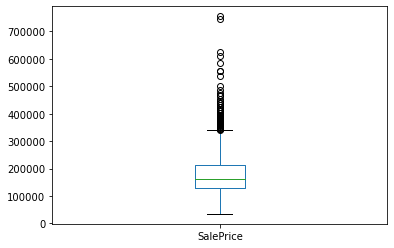

In [30]:
House_price['SalePrice'].plot.box()

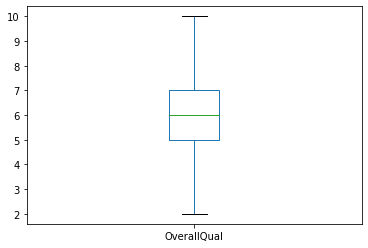

In [31]:
# Let remove outliers
# for House_price['OverallQual'].plot.box() the statistic visualization shows that one (1) is too small
House_price_new = House_price[(House_price.OverallQual >=2)]
House_price_new['OverallQual'].plot.box()

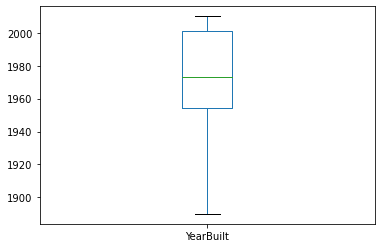

In [32]:
# for House_price['YearBuilt'].plot.box() the statistic visualization shows that (1872) is too small
House_price_new = House_price[(House_price.YearBuilt >= 1890)]
House_price_new['YearBuilt'].plot.box()

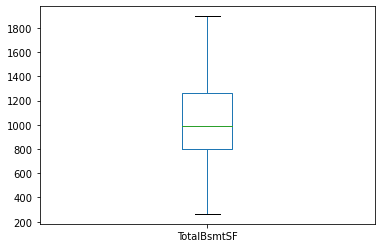

In [33]:
# for House_price['TotalBsmtSF'].plot.box() the statistic visualization shows that 0 is too small 
# and 2000 and more are too large
House_price_new = House_price[(House_price.TotalBsmtSF >= 250) & (House_price.TotalBsmtSF <= 1900)]
House_price_new['TotalBsmtSF'].plot.box()

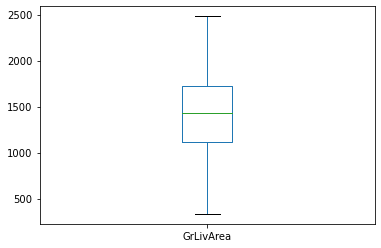

In [34]:
# for House_price['GrLivArea'].plot.box() the statistic visualization 2500 and more are too large
House_price_new = House_price[(House_price.GrLivArea <= 2500)]
House_price_new['GrLivArea'].plot.box()

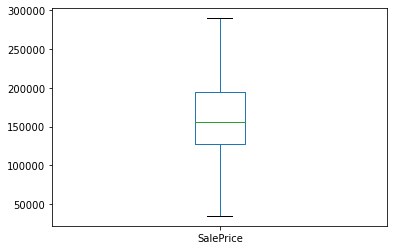

In [35]:
# for House_price['SalePrice'].plot.box() the statistic visualization shows that 290000 and more are too large
House_price_new = House_price[(House_price.SalePrice <= 290000)]
House_price_new['SalePrice'].plot.box()

# III: Bivariate analysis

Text(0, 0.5, 'SalePrice')

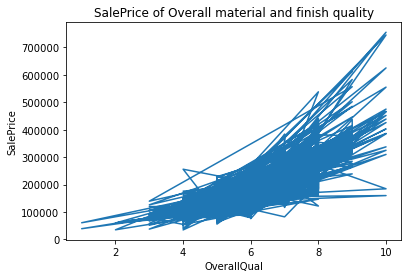

In [39]:
#For each of the four chosen predictive features:
#1. Draw the scatter plot of this feature against SalePrice (set title, axis label properly).
# OverallQual
plt.plot( House_price['OverallQual'], House_price['SalePrice'] )
plt.title("SalePrice of Overall material and finish quality")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

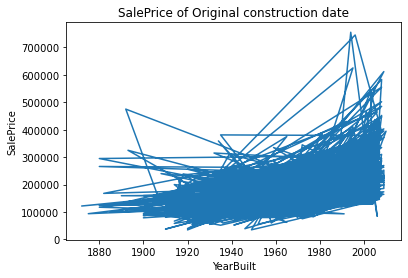

In [41]:
# YearBuilt: 
plt.plot( House_price['YearBuilt'], House_price['SalePrice'])
plt.title("SalePrice of Original construction date")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

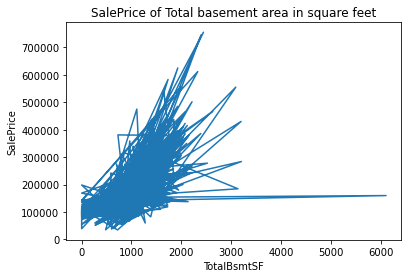

In [42]:
# TotalBsmtSF: 
plt.plot( House_price['TotalBsmtSF'], House_price['SalePrice'])
plt.title("SalePrice of Total basement area in square feet")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

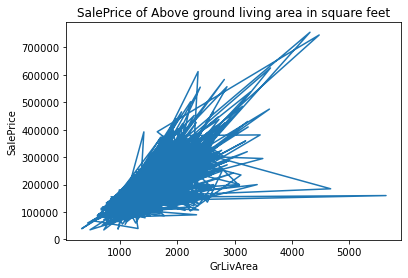

In [43]:
# GrLivArea: 
plt.plot( House_price['GrLivArea'], House_price['SalePrice'])
plt.title("SalePrice of Above ground living area in square feet")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [44]:
# 2. Calculate the correlation coefficient
House_price.corr()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
OverallQual,1.000000,0.572323,0.537808,0.593007,0.790982
YearBuilt,0.572323,1.000000,0.391452,0.199010,0.522897
TotalBsmtSF,0.537808,0.391452,1.000000,0.454868,0.613581
GrLivArea,0.593007,0.199010,0.454868,1.000000,0.708624
SalePrice,0.790982,0.522897,0.613581,0.708624,1.000000


In [45]:
# 3. Describe what you discover: positive correlation, negative correlation, no correlation
#I discover that there is a strong positive correlation between two variables with the same feature name.
#however we can see that there is a linear relationship between Overall and SalePrice, also between GrlivArea and SalePrice.
#YearBuilt and TotalBsmtSF have a relation with SalePrice not strong or not weak